In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

# Problem 1

1000


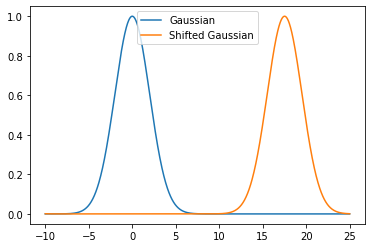

In [149]:
def func(ar, shift):
    J = np.complex(0, 1)
    
    F=np.fft.fft(ar)
    k = np.arange(len(F))
    G = np.exp(2 * np.pi * J * shift * k/ 1000)
    return np.real(np.fft.ifft(F*G))

N = 1000
x = np.linspace(-10, 25, N)
σ = 2
y = np.exp(-0.5 * x**2/( σ**2 ))
print(len(y))

plt.plot(x, y, label = 'Gaussian')
plt.plot(x, func(y, len(y)/2), label = 'Shifted Gaussian')
plt.legend()

# Problem 2

## a)

/Users/junalexsugiyama/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


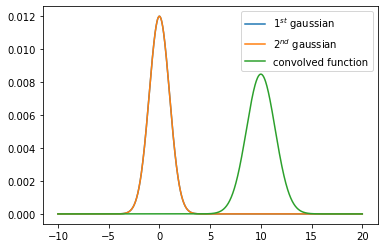

In [4]:
def func1(ar1 ,ar2):
    ar1 = ar1/ar1.sum()
    ar2 = ar2/ar2.sum()
    
    F = np.fft.fft(ar1)
    G = np.fft.fft(ar2) 
    
    return (np.fft.ifft(F * G))
                   
def gaussian(x, σ, μ):
    return np.exp(-0.5 * (x - μ)**2/σ**2)

N = 1000
x = np.linspace(-10, 20, N)
y1 = gaussian(x, 1, 0)
y2 = gaussian(-x,1 , 0) # since conj(F(k)) = DFT(f(-x)), we'are taking -x everywhere, doesnt matter with 

plt.plot(x, y1/y1.sum(), label =  '1$^{st}$ gaussian' )
plt.plot(x, y2/y2.sum(), label = '2$^{nd}$ gaussian')
plt.plot(x, func1(y1, y2), label = 'convolved function')
plt.legend()

## b)

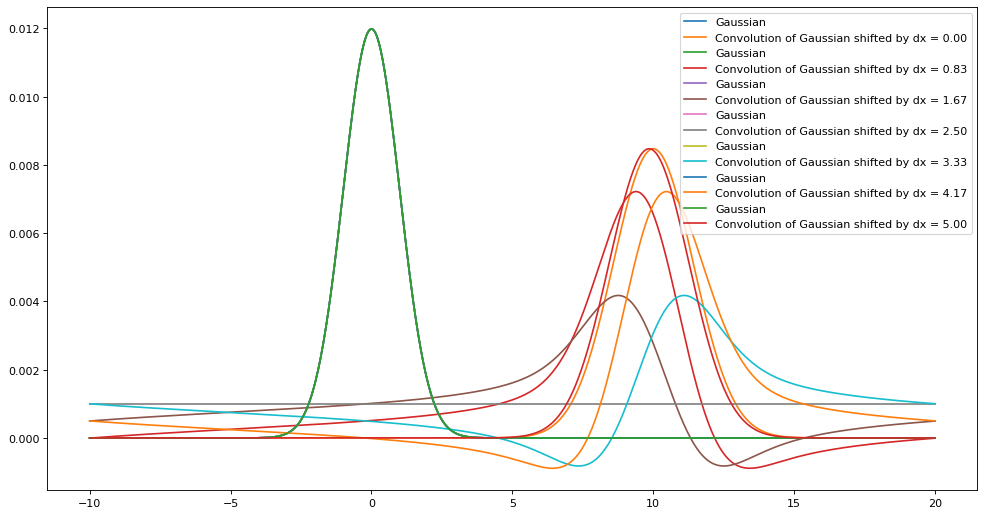

In [5]:
N = 1000
x = np.linspace(-10, 20, N)
y1 = gaussian(x, 1, 0)
y2 = gaussian(-x,1 , 0) 

dx = np.linspace(0, 5, 7)

plt.figure(figsize=(15, 8), dpi=80)
for i in dx:
    y_shift = func(y1, i)
    
    plt.plot(x, y1/y1.sum(), label =  'Gaussian' )
    plt.plot(x, func1(y_shift, y2), label = f'Convolution of Gaussian shifted by dx = {i:.2f}')
    plt.legend()
    

# Problem 3

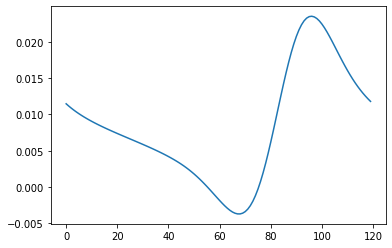

In [165]:
N = 100
x = np.linspace(-10, 10, N)
y1 = gaussian(x, 1, 0)
y2 = gaussian(-x, 2, 4)

def window(ar1, ar2):
    zrs = np.zeros(10)
    
    #dar1 = np.insert(ar1,len(ar1),zrs)
    #ar1 = np.insert(ar1, 0,zrs)
    #print(ar1)
    #ar2 = np.insert(ar2,len(ar2), zrs)
    #ar2 = np.insert(ar2, 0, zrs)
    
    #ar1_shift = func(ar1, len(ar1)/2)
    #ar2_shift = func(ar2, len(ar2)/2)
    #plt.plot(ar1)
    #plt.plot(ar1_shift)
    y1_w = ar1 #* window
    y2_w = ar2 #* window
    return func1(ar1_shift, ar2_shift)


#plt.plot(x, y1/y1.sum(), label =  'Gaussian' )
#plt.plot(x, y2/y2.sum())
plt.plot(window(y1, y2))

    

# Problem 4

## a)

$$\sum_{x = 0}^{N-1}  e^{-\frac{2\pi i k x}{N}}$$

Let $e^{-\frac{-2\pi i k }{N} = \alpha }$, then: 
   
   $$\sum_{x = 0}^{N-1}  e^{-\frac{2\pi i k x}{N}} =  \sum_{x = 0}^{N-1} \alpha ^ x$$
   
   $$S_n = \alpha^0 + \alpha^1 + ... + \alpha^{N-1}, $$
   
   $$\alpha S_n = \alpha(\alpha^0 + \alpha^1 + ... + \alpha^{N-1}) = \alpha^1 + ... + \alpha^{N}$$
   
   Subsctrating $S_n - S_{n-1}$:
   
   $$ S_n - S_{n-1} = S_n - \alpha S_n =  $$
   $$S_n (1 - \alpha) = (\alpha^0 + \alpha^1 + ... + \alpha^{N-1}) - (\alpha^1 + ... + \alpha^{N})= \alpha^0 - \alpha^{N}$$
   
   So, 
   $$S_n = \frac{1 - \alpha^N}{1 - \alpha} = \frac{1 - e^{-2\pi i k}}{1 - e^{-\frac{2\pi i k}{N}}}$$
   
    

# b) 

For k $\rightarrow 0$, the value in the exponent is small. Using Taylor expansion: 

$$\sum_{x = 0}^{N-1}  e^{-\frac{2\pi i k x}{N}} = \frac{1 - \alpha^N}{1 - \alpha} = \frac{1 - e^{-2\pi i k}}{1 - e^{-\frac{2\pi i k}{N}}} = $$

$$ \frac{1 - (1  -2\pi i k)}{1 - (1 - \frac{2\pi i k }{N} )}) = $$

$$\frac{2\pi i k }{\frac{2\pi i k }{N}} \rightarrow N $$

## c)

Text(0.5, 0, 'k')

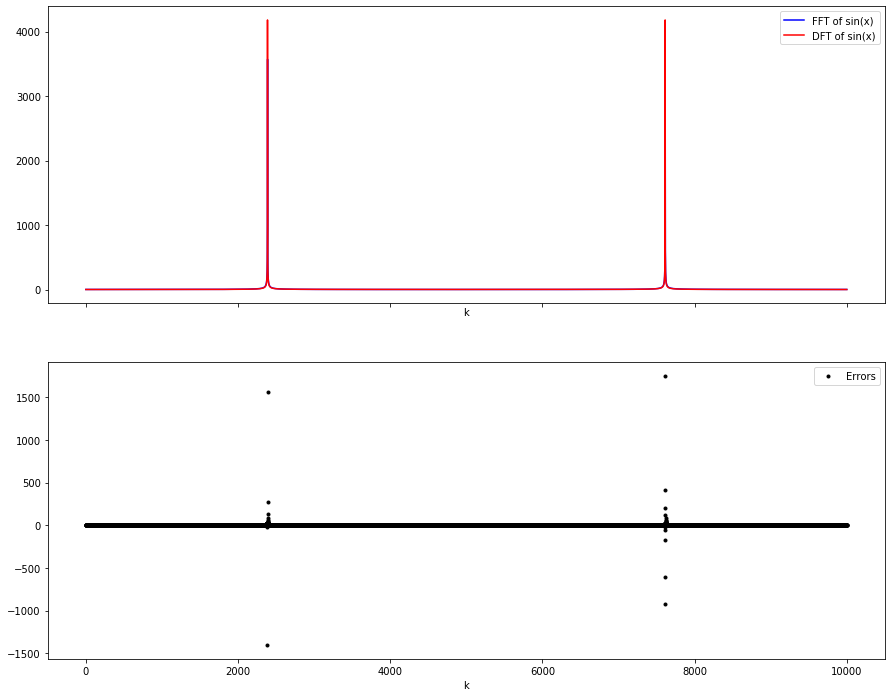

In [100]:
ω = 1.5 #non-integer values of frequency of sin function
def prod(k, N):
    J = np.complex(0, 1)
    x = np.arange(0.0, N) # x interval for every k 
    #here i used the sin(x) in exponential form: sin(x) = (e^(ix) - e^(-ix))/2i
    return np.sum(np.exp(- 1 * x * k * 2 * J * np.pi/N) * np.sin(1.5 *x))
                  #(np.exp(J * ω* x) - np.exp(-J * ω * x) )/(2*J ))

N = 10000
k = np.linspace(0, N , N +1)

dftar = []
for i in k:
    dftar.append(prod(i, N))


x = np.linspace(0, N , N+1)
y = np.sin(ω * x)
yft = np.fft.fft(y)

fig0, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex = True, figsize = (15, 12) ) # two axes on figure

ax1.plot(np.abs(yft), color = 'b', label = 'FFT of sin(x)')
ax1.plot(np.abs(dftar), color = 'r', label = 'DFT of sin(x)')
ax1.set_xlabel('k')
ax1.legend()

ax2.plot(np.abs(yft) - np.abs(dftar), '.k', label = 'Errors')
ax2.legend()
ax2.set_xlabel('k')

In [101]:
# chi-square: sum((observed - expected)**2/expected
print(f'{(np.sum((np.abs(yft) - np.abs(dftar))**2/np.abs(yft))):.2f}')

7030.68


## d)

Text(0.5, 0, 'k')

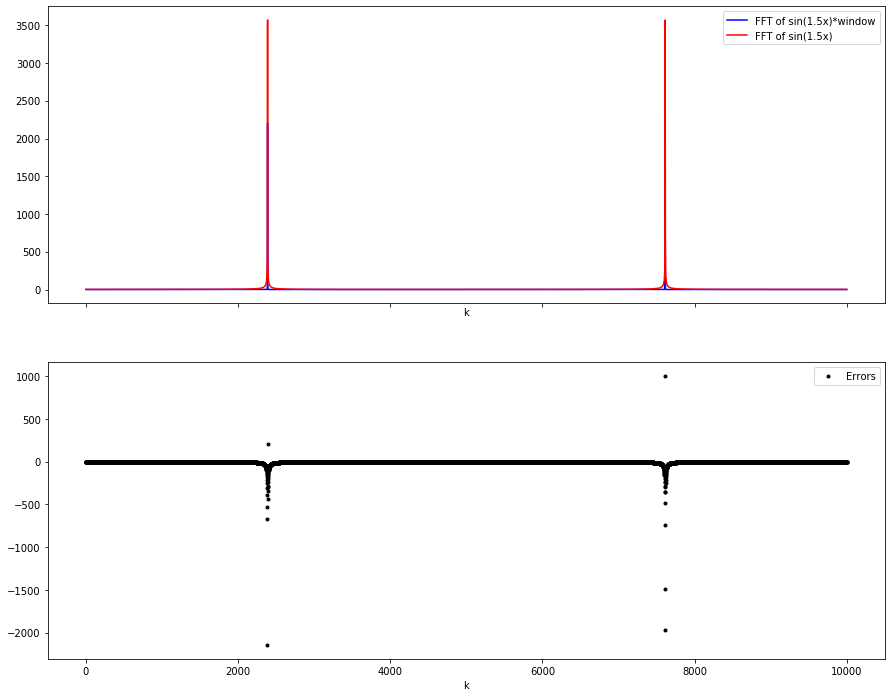

In [93]:
window = 0.5 - 0.5*(np.cos(2*np.pi*x/N))
y_window = y * window 

yft_window = np.fft.fft(y_window)
fig0, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex = True, figsize = (15, 12) ) # two axes on figure

ax1.plot(np.abs(yft_window), color = 'b', label = 'FFT of sin(1.5x)*window')
ax1.plot(np.abs(yft), color = 'r', label = 'FFT of sin(1.5x)')
ax1.set_xlabel('k')
ax1.legend()

ax2.plot(np.abs(yft_window) - np.abs(dftar), '.k', label = 'Errors')
ax2.legend()
ax2.set_xlabel('k')

In [94]:
print(f'{(np.sum((np.abs(yft_window) - np.abs(yft))**2/np.abs(yft))):.2f}')

47844.69


array([-0.89342866, -0.89342858, -0.89342835, ..., -0.89342948,
       -0.89342926, -0.89342888])

## e)

In [61]:
def prod1(k, N):
    J = np.complex(0, 1)
    x = np.arange(0.0, N) # x interval for every k 
    #here i used the cos(x) in exponential form: cos(x) = (e^(ix) - e^(-ix))/2i
    return np.sum(np.exp(- 1 * x * k * 2 * J * np.pi/N) * (0.5 + 0.5 * 0.5 * (np.exp(J * 2* np.pi * x/N) + np.exp(-J * 2* np.pi * x/N))))

dftwindow = []
for i in k:
    dftwindow.append(prod1(i, N))
print('Fourier Transform of the window function: ', np.abs(dftwindow), ", where N = 10000. As it's seen the list is [N/2, N/4, ..., N/2, N/4]")


Fourier Transform of the window function:  [5.00000000e+03 2.50124974e+03 2.33292178e+00 ... 2.50249869e+03
 4.99999947e+03 2.50000000e+03] , where N = 10000. As it's seen the list is [N/2, N/4, ..., N/2, N/4]


# Problem 5

(8, 33)
0.000244140625


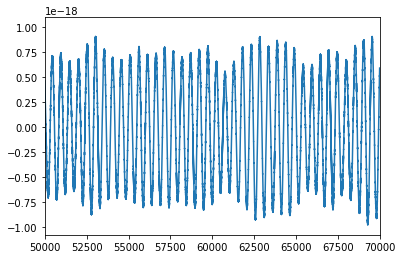

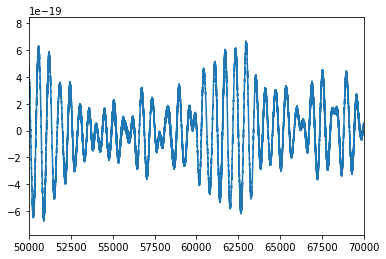

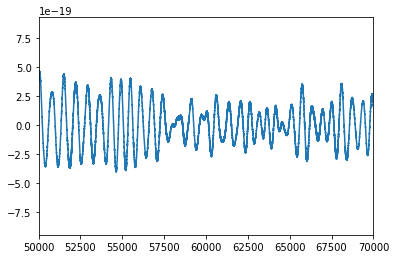

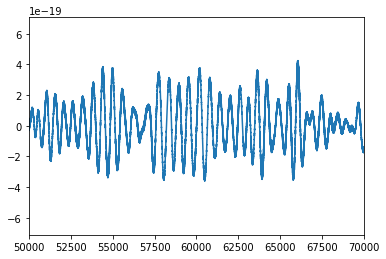

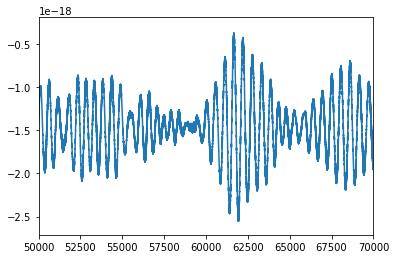

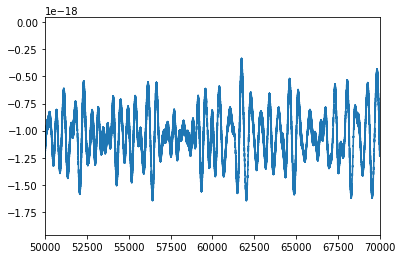

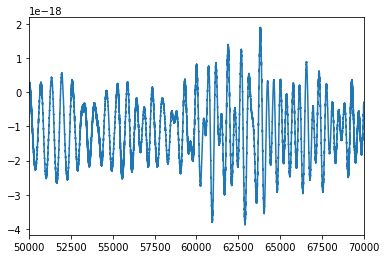

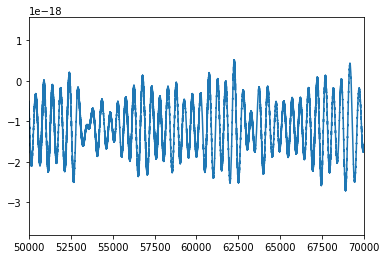

In [17]:
import h5py
import glob
plt.ion()

def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    tp=template[0]
    tx=template[1]
    return tp,tx
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc



#fnames=glob.glob("[HL]-*.hdf5")
#fname=fnames[0]
name = '/phys512-fall2022/LOSC_Event_tutorial-master/'
fname=['H-H1_LOSC_4_V1-1167559920-32.hdf5', 
      'H-H1_LOSC_4_V2-1126259446-32.hdf5',
      'H-H1_LOSC_4_V2-1128678884-32.hdf5', 
      'H-H1_LOSC_4_V2-1135136334-32.hdf5', 
      'L-L1_LOSC_4_V1-1167559920-32.hdf5', 
      'L-L1_LOSC_4_V2-1126259446-32.hdf5', 
      'L-L1_LOSC_4_V2-1128678884-32.hdf5', 
      'L-L1_LOSC_4_V2-1135136334-32.hdf5']
#print('reading file ',fname)
A = np.zeros((8))
print(np.shape(A))
for i in range(len(fname)):
    strain,dt,utc=read_file(name + fname[i] )
    plt.figure()
    plt.plot(strain)
    plt.xlim([50000,70000])
    
print(dt)
#th,tl=read_template('GW150914_4_template.hdf5')
#template_name='GW150914_4_template.hdf5'
#tp,tx=read_template(template_name)

#plt.xlim([20000,30000])
#plt.xlim([21600,21800]);plt.ylim([-2e-19,2e-19])
